<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/11_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set()
np.set_printoptions(precision=6, suppress=True, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

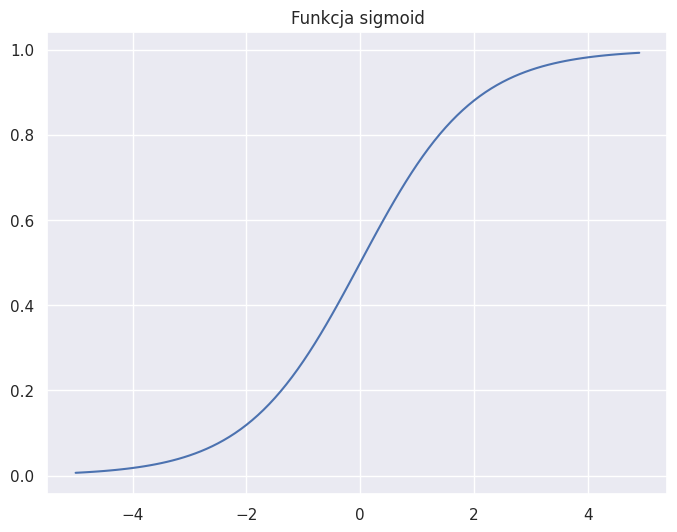

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Funkcja sigmoid')
plt.show()

In [9]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

In [13]:
data.shape

(569, 30)

In [14]:
target.shape

(569,)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [29]:
for i in [X_train, X_test, y_train, y_test]:
  print()
  print(i.shape)


(426, 30)

(143, 30)

(426,)

(143,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train

array([[-0.35, -1.44, -0.41, ..., -0.92, -0.93, -0.81],
       [-0.20, 0.31, -0.13, ..., 1.44, 1.15, 1.57],
       [-0.33, -0.22, -0.32, ..., -0.72, 0.53, -0.62],
       ...,
       [0.05, -0.56, -0.07, ..., -1.23, -0.68, -1.26],
       [-0.04, 0.10, -0.03, ..., 1.09, 0.49, 1.26],
       [-0.55, 0.31, -0.60, ..., -0.60, -0.30, -0.83]])

In [37]:
X_test

array([[-0.47, -0.14, -0.44, ..., -0.17, 0.22, 0.24],
       [1.36, 0.50, 1.31, ..., 1.03, -0.53, -0.99],
       [0.38, 0.07, 0.40, ..., 0.60, -0.07, -0.18],
       ...,
       [-0.87, -0.56, -0.86, ..., -0.60, 0.20, -0.26],
       [1.61, 0.70, 1.57, ..., 1.96, -0.18, -0.41],
       [-1.09, -1.65, -1.08, ..., -0.71, 0.10, -0.35]])

In [34]:
scaler.mean_

array([14.12, 19.20, 91.89, 654.92, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.21, 2.86, 40.13, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.21, 25.51, 106.89, 873.72, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [35]:
scaler.scale_

array([3.53, 4.23, 24.28, 356.02, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.54, 2.09, 47.97, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.78, 6.02, 33.04, 564.58, 0.02, 0.15, 0.20, 0.06, 0.06, 0.02])

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(X_test) #👈 prediction
y_pred[:5]

array([1, 0, 0, 1, 1])

In [45]:
y_prob = log_reg.predict_proba(X_test) #👈 prediction probability
y_prob[:5]

array([[0.12, 0.88],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00]])

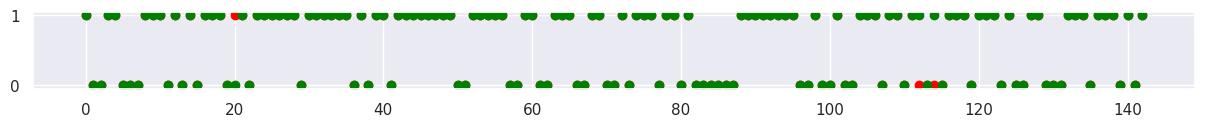

In [60]:
plt.figure(figsize=(15, 1))
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.scatter(range(len(y_pred)), y_test, color='green')
plt.show()

Accuracy: 0.9790209790209791


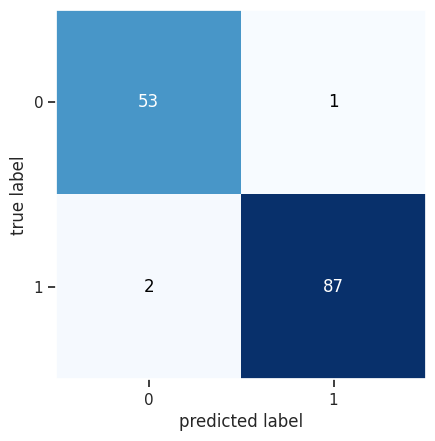

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [69]:
def plot_confusion_matrix(cm):
  cm =cm[::-1]
  cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='Confusion matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

